<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/071023_Rumor_Model_Hyperedge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd

In [31]:
#!pip install xgi
import xgi

## Part 1: Hypergraph Generation
The following steps generate a hyper graph using the XGI/HyperNetX python package,  following power-law degree distribution for predifined number of nodes n, number of hyperedges num_hyper_edges, degree exponent gamma, using a configuration model with data stored in a dictionary.

In [98]:
# Step 1: Generate Degree Sequence
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    # kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

# Step 2: Generate Hyper Edge Size Sequence
def generate_hyper_edge_sizes(degrees, num_hyper_edges):
    total_degrees = sum(degrees)
    hyper_edge_sizes = []

    # Calculate the average size for each hyper edge
    avg_size = total_degrees // num_hyper_edges
    remainder = total_degrees % num_hyper_edges

    # Define the range for the random distribution
    min_size = 1  # Lower bound of the range
    max_size = total_degrees-num_hyper_edges  # Upper bound of the range

    # Generate hyper edge sizes
    for _ in range(num_hyper_edges):
        size = random.randint(min_size, max_size)
        hyper_edge_sizes.append(size)

    return hyper_edge_sizes


# Step 3: Create Copies of Nodes
def create_node_copies(degrees):
    node_copies = []
    for i, degree in enumerate(degrees):
        for _ in range(degree):
            node_copies.append(i)
    return node_copies

# Step 4: Create Copies of Hyper Edges
def create_hyper_edge_copies(hyper_edge_sizes):
    hyper_edge_copies = []
    for i, size in enumerate(hyper_edge_sizes):
        for _ in range(size):
            hyper_edge_copies.append(i)
    return hyper_edge_copies

# Step 5: Randomly Pair Copies
def randomly_pair_copies(node_copies, hyper_edge_copies):
    random.shuffle(node_copies)
    random.shuffle(hyper_edge_copies)
    pairs = []
    for i in range(len(node_copies)):
        pairs.append((node_copies[i], hyper_edge_copies[i]))
    return pairs

# Step 6: Convert Bipartite Graph to A Hypergraph Dictionary
def convert_to_hypergraph(pairs):
    hypergraph = {}
    for pair in pairs:
        node, hyper_edge = pair
        if hyper_edge in hypergraph:
            hypergraph[hyper_edge].append(node)
        else:
            hypergraph[hyper_edge] = [node]
    return hypergraph


In [102]:
# Example test usage
n =50  # Number of nodes
gamma = 2.5  # Power-law exponent
kmin = 3  # Minimum degree
num_hyper_edges = 6  # Desired number of hyper edges


# Step 1: Generate Degree Sequence
degrees = generate_degree_sequence(n, gamma, kmin)
print("Degree Sequence: ", degrees)

# Step 2: Generate Hyper Edge Size Sequence
hyper_edge_sizes = generate_hyper_edge_sizes(degrees, num_hyper_edges)
print("Hyper Edge Sizes: ", hyper_edge_sizes)

# Step 3: Create Copies of Nodes
node_copies = create_node_copies(degrees)

# Step 4: Create Copies of Hyper Edges
hyper_edge_copies = create_hyper_edge_copies(hyper_edge_sizes)

# Step 5: Randomly Pair Copies
pairs = randomly_pair_copies(node_copies, hyper_edge_copies)

# Step 6: Convert Bipartite Graph to Hypergraph
hyperedge_dict = convert_to_hypergraph(pairs)

# Print the resulting hypergraph
print("Hypergraph Dictionary: ", hyperedge_dict)


Degree Sequence:  [4, 3, 4, 5, 4, 3, 7, 3, 3, 3, 4, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Hyper Edge Sizes:  [83, 29, 6, 11, 36, 64]
Hypergraph Dictionary:  {0: [30, 43, 34, 46, 27, 37, 5, 1, 4, 27, 44, 26, 35, 33, 29, 47, 31, 49, 45, 36, 18, 45, 49, 37, 7, 43, 40, 26, 25, 45, 21, 16, 41, 11, 12, 24, 11, 23, 8, 35, 17, 32, 20, 2, 34, 38, 11, 15, 3, 9, 26, 46, 12, 36, 31, 39, 14, 17, 6, 14], 1: [6, 5, 33, 38, 22, 7, 4, 19, 4, 27, 46, 19, 10, 21, 48, 11, 36, 20, 16, 30, 21, 30], 5: [24, 8, 39, 0, 48, 6, 42, 6, 48, 25, 32, 28, 44, 47, 23, 0, 1, 24, 3, 2, 22, 32, 6, 11, 2, 47, 23, 13, 15, 44, 6, 20, 2, 16, 25, 33, 41, 10, 49, 28, 10], 4: [11, 0, 42, 6, 42, 22, 13, 4, 12, 10, 15, 29, 29, 38, 0, 28, 43, 3, 31, 18, 7, 40, 13, 18, 1, 40, 14, 5, 34, 11], 3: [8, 3, 19, 3, 37, 17, 9, 9], 2: [39, 35, 41]}


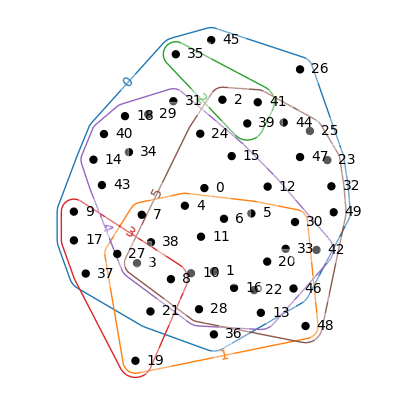

In [106]:
# Plot the hypergraph
import hypernetx as hnx
H2 = hnx.Hypergraph(hyperedge_dict)
plt.subplots(figsize=(5,5))
hnx.draw(H2)

In [105]:
# alternative way to draw the hypergraph
# H = xgi.Hypergraph(hyperedge_dict)
# pos = xgi.barycenter_spring_layout(H)
# xgi.draw(H, pos, node_labels=True, font_color_nodes="gray")

## Part 2: Assign Threshold
The following steps assigns a threshold value to each node in the network. The threshold follows a uniform or normal distribution with predefined mean (mu) and standard deviation (sigma).

## Part 2: Rumor Spreading on Hypergraph
The follow steps extends the basic rumor spreading model to a hypergraph. An infection or recovery event can only happen if its infected or recovered neighbors reach a pre-assigned threshold.  